In [1]:
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)

X = adult.data.features 
y = adult.data.targets

In [2]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
## General EDA
# 1. Shape
# 2. Data Types
# 3. Class Distribution
# 4. Missing Values
# 5. Basic Stats

In [4]:
X.shape

(48842, 14)

In [5]:
display(y.dtypes)

income    object
dtype: object

In [6]:
import pandas as pd

In [7]:
df = pd.concat([X, y], axis=1)
target = 'income'

df[target] = df[target].apply(lambda x: x.replace('.',''))
df.groupby(target).size()

income
<=50K    37155
>50K     11687
dtype: int64

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [9]:
print("Missing")
for col in df.columns:
    print(f"{col}: {round((len(df[df[col].isna()])*100)/len(df), 2)} %")

Missing
age: 0.0 %
workclass: 1.97 %
fnlwgt: 0.0 %
education: 0.0 %
education-num: 0.0 %
marital-status: 0.0 %
occupation: 1.98 %
relationship: 0.0 %
race: 0.0 %
sex: 0.0 %
capital-gain: 0.0 %
capital-loss: 0.0 %
hours-per-week: 0.0 %
native-country: 0.56 %
income: 0.0 %


In [10]:
for col in ['native-country', 'workclass', 'occupation']:
    df[col].fillna("NA")

In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


----

In [12]:
## Numeric Variables
num_cols = df.select_dtypes(include='number').columns

In [13]:
import matplotlib.pyplot as plt

In [14]:
df_num_std = (df[num_cols] - df[num_cols].mean())/df[num_cols].std()

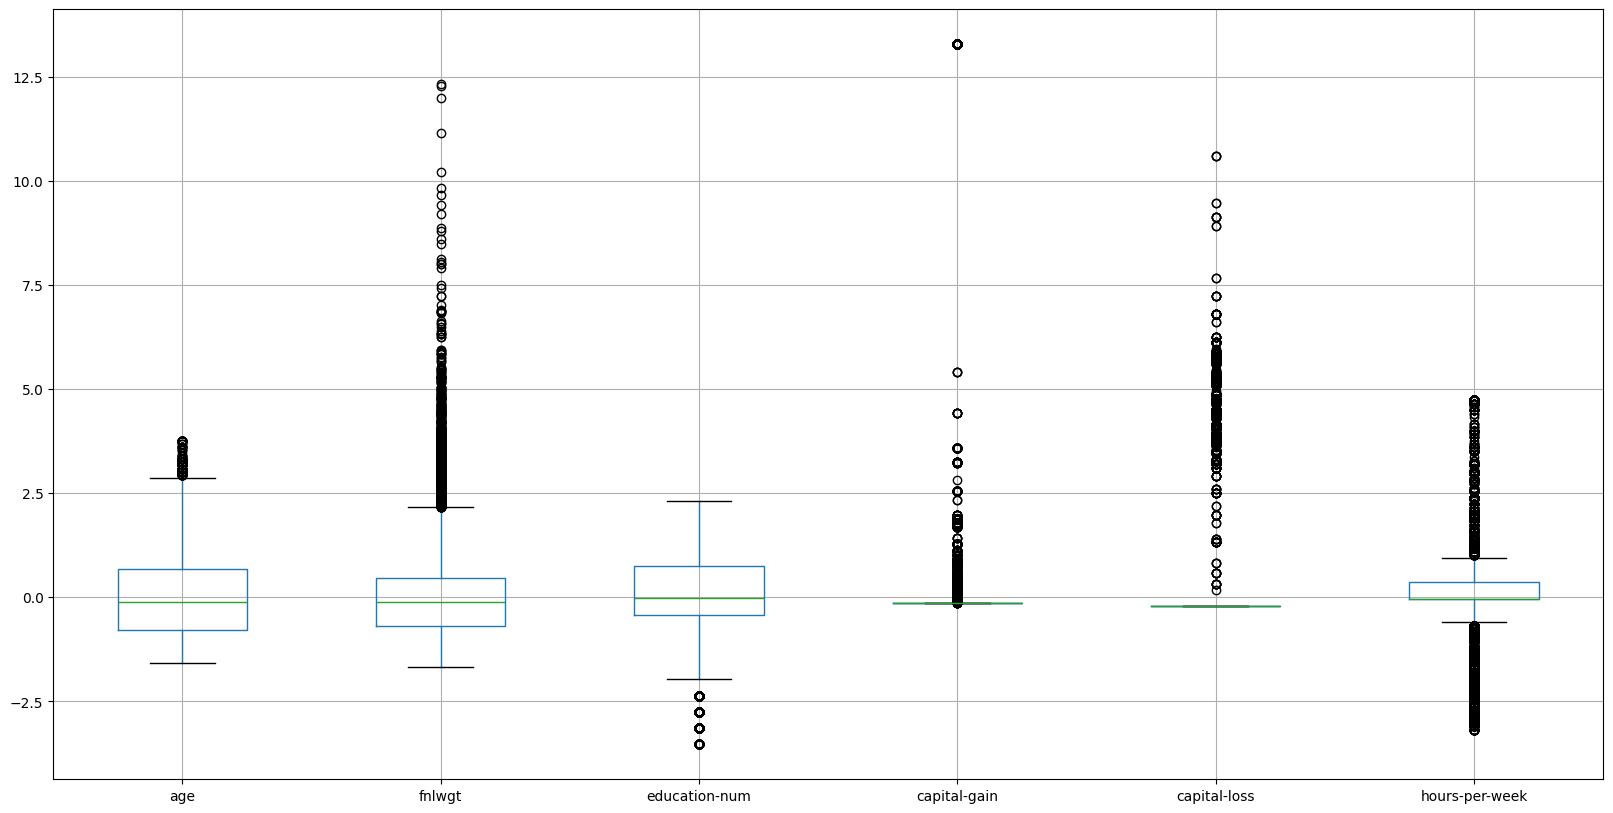

In [15]:
# Standardizing and plotting distributions
df_num_std.boxplot(figsize=(20, 10))
plt.show()

In [16]:
# Percentage of Outliers

for col in num_cols:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = (Q3 - Q1)

    lower_bound = Q1 - 1.5*(IQR)
    upper_bound = Q3 + 1.5*(IQR)

    outliers = round(len(df[(df[col] < lower_bound) | (df[col] > upper_bound)]) * 100 / len(df), 2)

    print(f"{col}: {outliers} %")


age: 0.44 %
fnlwgt: 2.97 %
education-num: 3.67 %
capital-gain: 8.26 %
capital-loss: 4.67 %
hours-per-week: 27.63 %


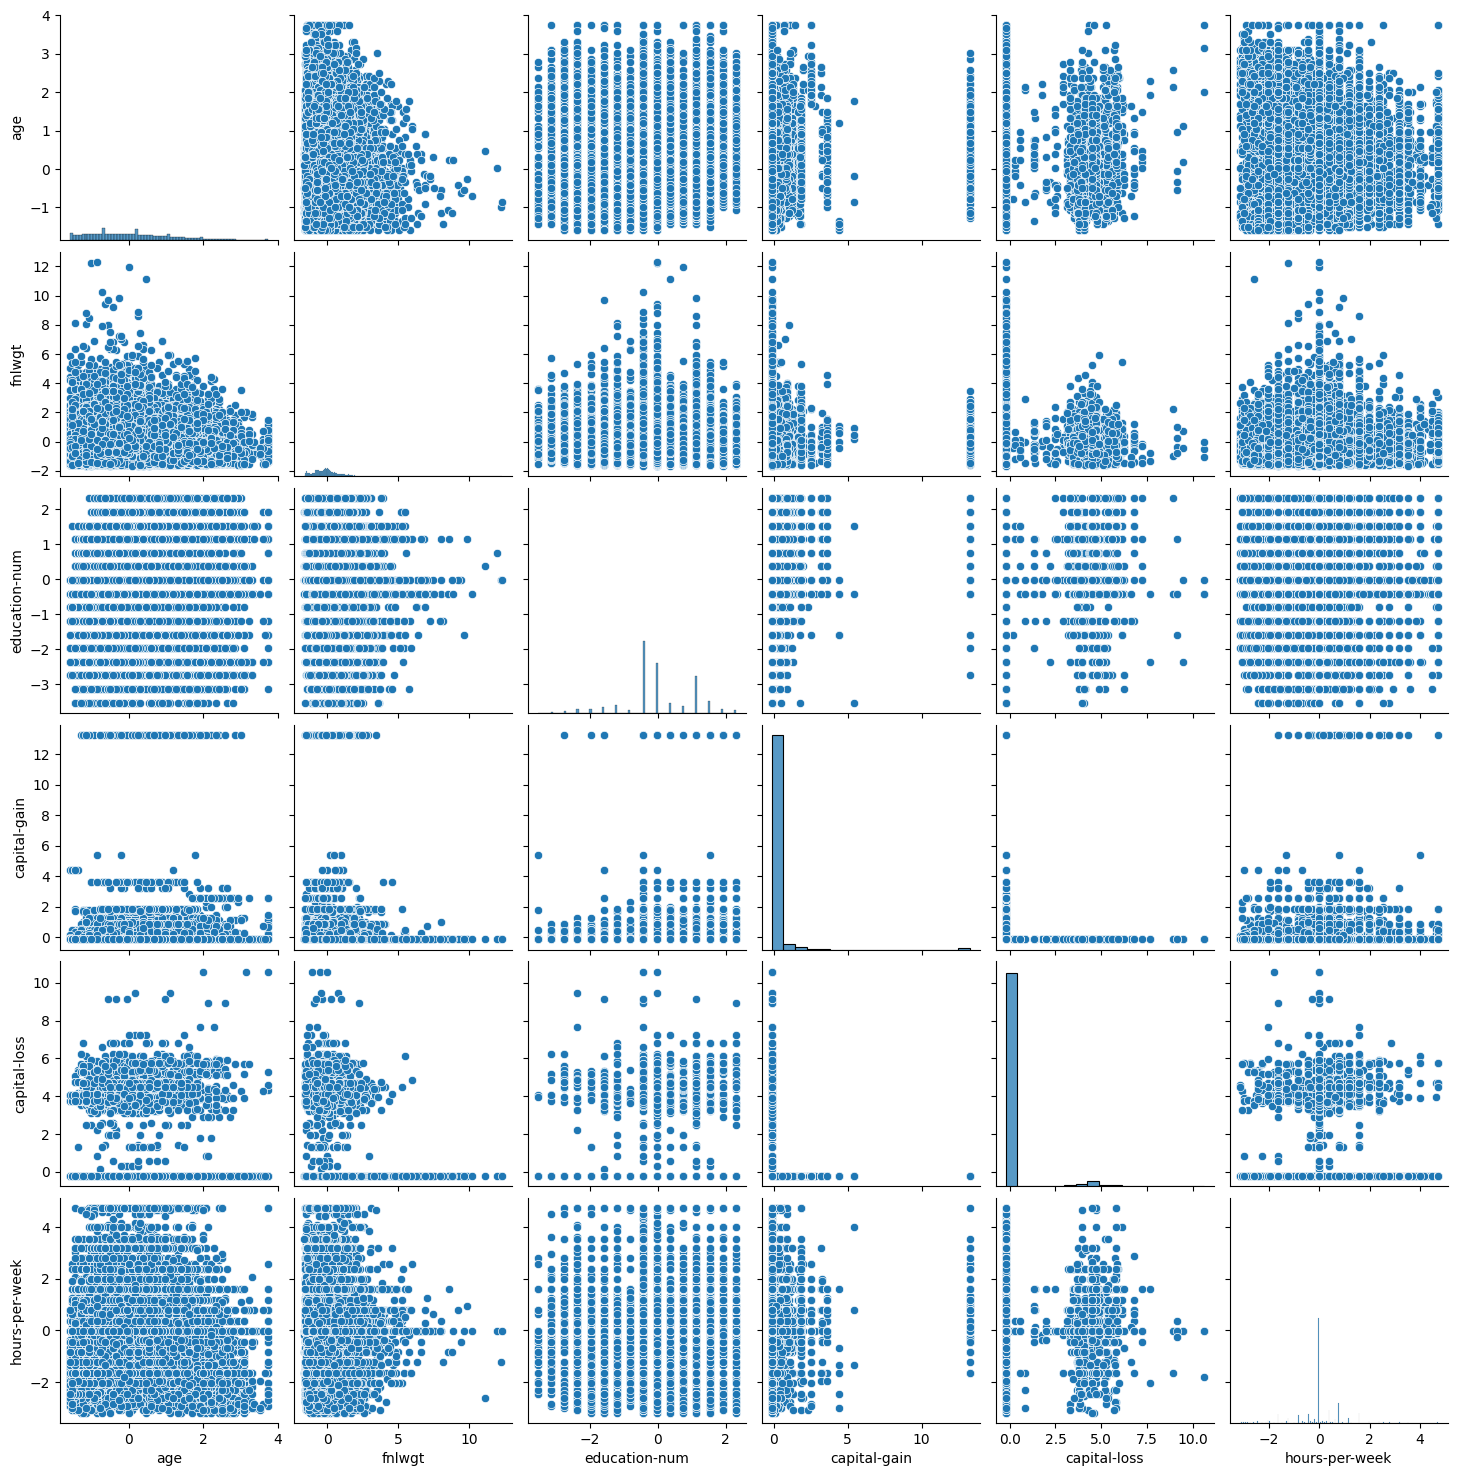

In [17]:
# Scatter plot of correlations
import seaborn as sns
sns.pairplot(df_num_std)
plt.show()

In [18]:
corr = df_num_std.corr()
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [19]:
## Categorical Columns

cat_cols = df.select_dtypes(include='object').columns

from scipy.stats import chi2_contingency
chi2_p = {}

for col in cat_cols:
    contingency = pd.crosstab(
        df[col],
        df[target]
    )
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_p[col] = p
chi2_p

{'workclass': 2.23633153216216e-309,
 'education': 0.0,
 'marital-status': 0.0,
 'occupation': 0.0,
 'relationship': 0.0,
 'race': 4.284377710223499e-104,
 'sex': 0.0,
 'native-country': 1.5032791592475216e-70,
 'income': 0.0}

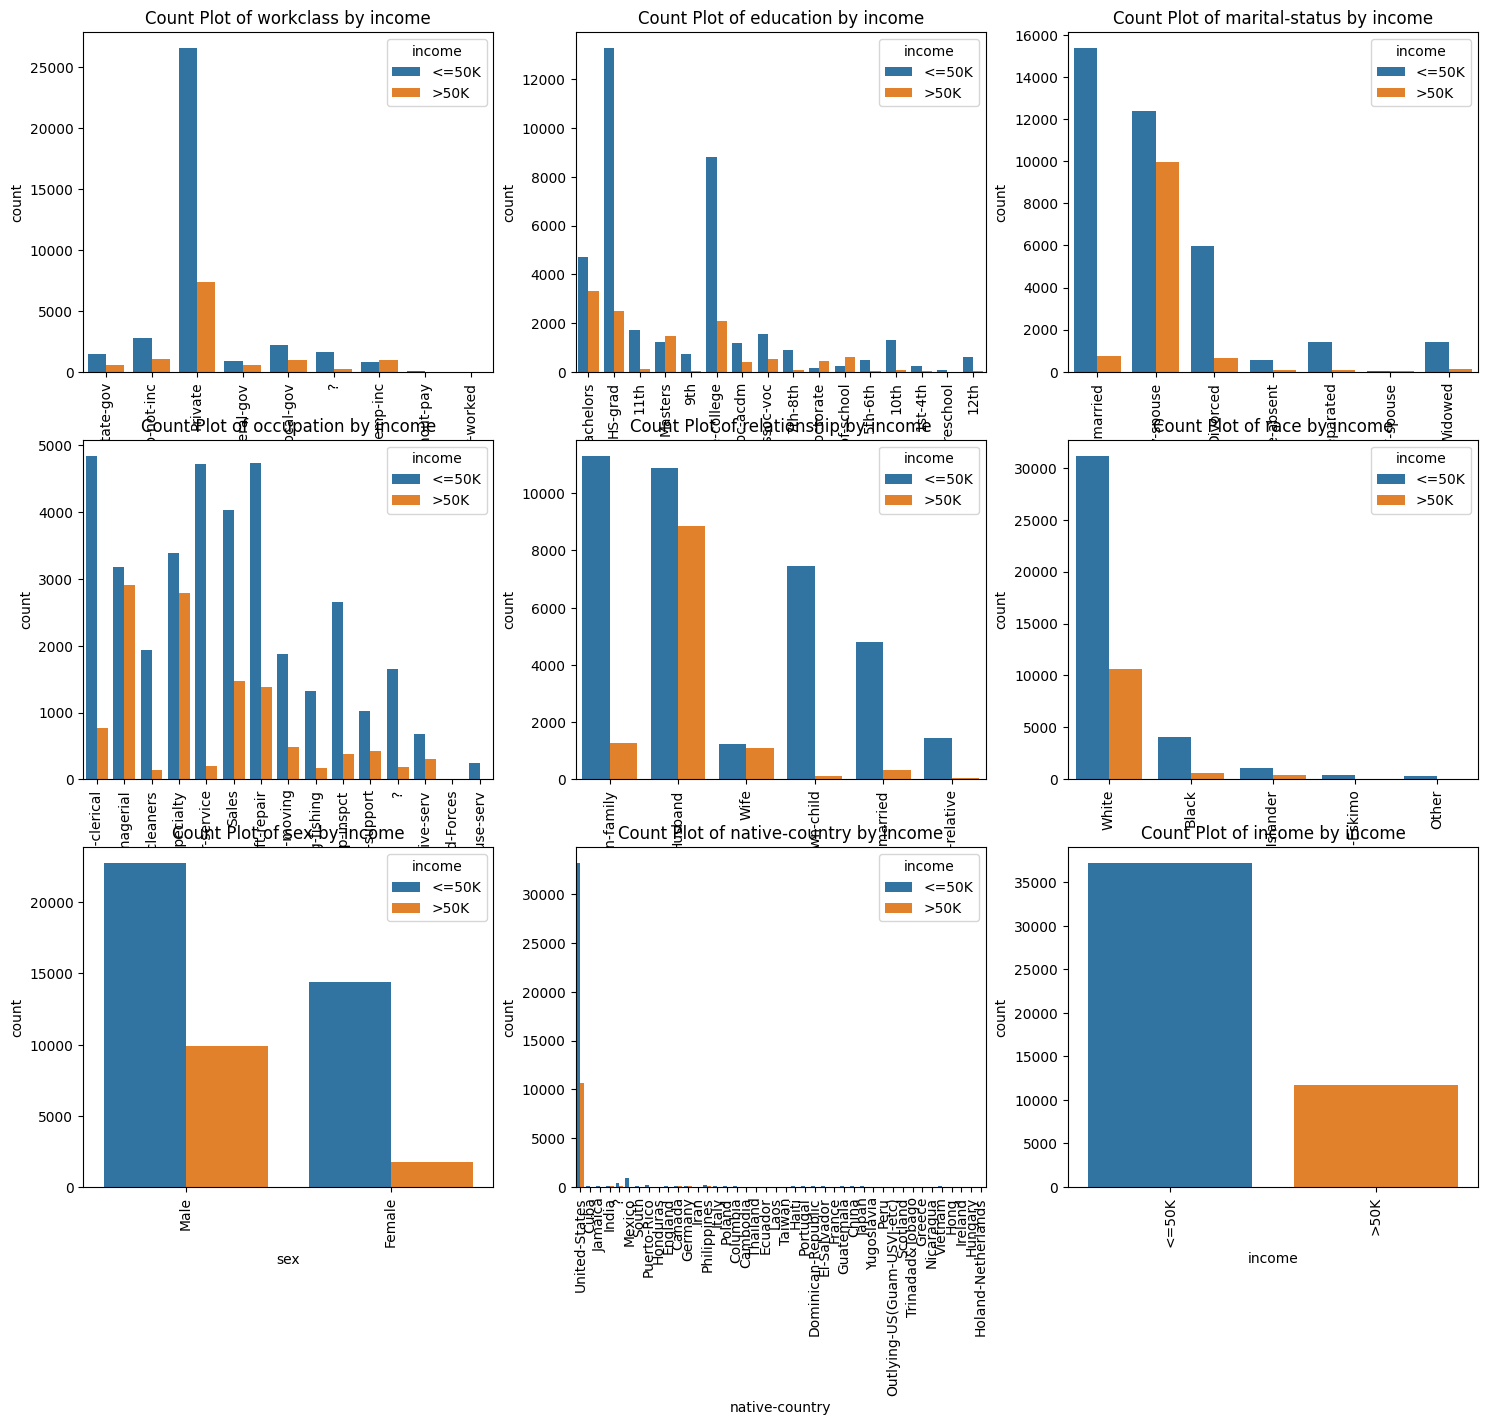

In [20]:
n_cols = 3
n_rows = len(cat_cols)//3 + (len(cat_cols) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue=target, data=df, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col} by {target}")
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

-----

In [21]:
# Preprocessing

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, auc
from sklearn.pipeline import Pipeline

In [22]:
## Modeling

In [23]:
X, y = pd.concat([df_num_std, df[cat_cols].iloc[:,:-1]], axis=1), df[cat_cols][[target]]

In [24]:
y[target] = y[target].map({'<=50K':0, '>50K': 1})

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y.values.reshape(-1),
    test_size=0.3)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.1
)

In [26]:
len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val)

(30770, 14653, 3419, 30770, 14653, 3419)

In [27]:
cat_cols = list(cat_cols)
cat_cols.remove(target)

In [28]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [29]:
best_score = 0
best_pipeline = None

In [30]:
preprocessor = ColumnTransformer(
   transformers=[
       ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
       ('scaler', StandardScaler(), num_cols)
   ]
)


models = [
    RandomForestClassifier(),
    XGBClassifier()
]


model_params = [
    {
        'classifier__n_estimators': [10, 15, 20, 50, 75, 100, 150],
        'classifier__max_depth': [15, 20, 25, 30, 35, 40, 45, 50]
    },
    {
        'classifier__n_estimators': [10, 15, 20, 50, 75, 100, 150],
        'classifier__max_depth': [15, 20, 25, 30, 35, 40, 45, 50]
    }

]

for model, params in zip(models, model_params):

    pipeline = Pipeline(
        steps=[('preprocessor', preprocessor),        
               ('classifier', model)]
    )

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    print(f"Best Score:", {grid.best_score_})


    val_score = f1_score(y_val, grid.best_estimator_.predict(X_val))
    print(f"Test Score: {val_score}")
    
    if val_score > best_score:
        best_score = val_score
        best_pipeline = grid.best_estimator_


Best Score: {0.6770468069440746}
Test Score: 0.685222001325381
Best Score: {0.6959850765527186}
Test Score: 0.6889031430404106


In [31]:
f1_score(y_test, best_pipeline.predict(X_test))

0.6985959438377535

In [32]:
from sklearn.metrics import classification_report, roc_auc_score


In [33]:
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])}")

NameError: name 'y_pred' is not defined